In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import re
from math import hypot
from scipy.stats import norm
from scipy import stats
from matplotlib.transforms import ScaledTranslation

In [2]:
def load_data_to_dataframe(directory):
    """
    Scans a directory for CSV files containing matrix data, extracts 
    parameters from filenames, loads each matrix, flattens it, and 
    returns everything in a single pandas DataFrame.

    Args:
        directory (str): The path to the directory containing the CSV files.

    Returns:
        pandas.DataFrame: A DataFrame where each row corresponds to a file,
                          with columns for parameters and the flattened data.
    """
    pattern = re.compile(r'A2_(\d+\.?\d*)_tau_(\d+\.?\d*)_beta_(\d+\.?\d*)\.csv$')
    
    all_files_data = []

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        
        if match:
            a2_val, tau_val, beta_val = match.groups()
            file_path = os.path.join(directory, filename)
            
            # --- This is the key change ---
            # 1. Read the full MxM matrix into a DataFrame
            matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
            
            # 2. Get the underlying NumPy array and flatten it into a 1D array
            flattened_data = matrix_df.values.flatten()
            # -----------------------------
            
            data_row = {
                'a2_param': float(a2_val),
                'tau': float(tau_val),
                'beta': float(beta_val),
                # The 'data' column now holds a 1D NumPy array
                'data': flattened_data
            }
            
            all_files_data.append(data_row)
            
    if not all_files_data:
        print("⚠️ No matching files were found.")
        return pd.DataFrame()
        
    return pd.DataFrame(all_files_data)


In [3]:
Dir = '../LE/'
LE = load_data_to_dataframe(Dir)

/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/2131485411.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/2131485411.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/2131485411.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/2131485411.py:27: FutureWarning: The 'delim_

In [4]:
LE

,a2_param,tau,beta,data
0,0.9,0.1,2.0,"[0.524278, 0.535481, 0.523948, 0.482055, 0.523..."
1,0.9,0.1,3.0,"[0.546646, 0.525461, 0.48879, 0.480828, 0.4956..."
2,1.0,0.3,5.0,"[0.730658, 0.773333, 0.588684, 0.715666, 0.732..."
3,1.0,0.3,4.0,"[0.632155, 0.620698, 0.800436, 0.728334, 0.794..."
4,1.0,0.1,1.0,"[0.430772, 0.493387, 0.456502, 0.396977, 0.493..."
...,...,...,...,...
183,0.7,0.1,1.0,"[0.655359, 0.62382, 0.541783, 0.520771, 0.5366..."
184,0.7,0.3,4.0,"[0.35146, 0.6882, 0.472597, 0.57767, 0.725101,..."
185,1.0,0.4,2.0,"[0.734289, 0.501524, 0.841962, 0.753719, 1.033..."
186,1.0,0.4,3.0,"[1.15856, 1.22026, 1.08574, 1.10318, 1.20809, ..."


In [5]:
df_long = LE.explode('data')

# 2. (Optional but good practice) Ensure the data column is a numeric type
df_long['data'] = pd.to_numeric(df_long['data'])




In [6]:
df_long["data"].mean()

np.float64(0.5329467915265168)

In [7]:
df_summary = df_long[['a2_param', 'tau', 'beta']].copy()



In [8]:
df_summary = df_long.groupby(['a2_param', 'tau', 'beta'])['data'].mean().reset_index(name='mean_value')

<Axes: xlabel='a2_param', ylabel='mean_value'>

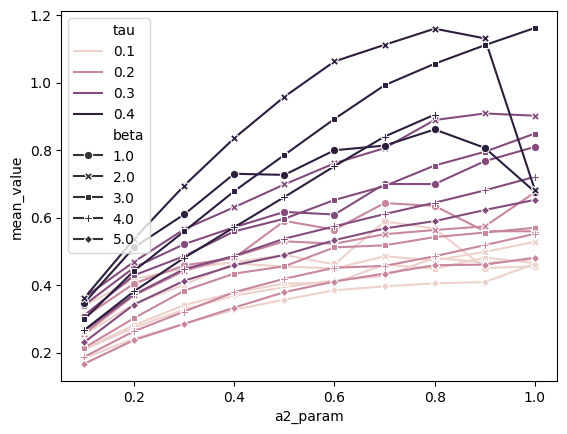

In [9]:
sns.lineplot(data=df_summary, x='a2_param', y='mean_value', hue='tau', style='beta', markers=True, dashes=False)

In [10]:
df_summary

,a2_param,tau,beta,mean_value
0,0.1,0.1,1.0,0.337799
1,0.1,0.1,2.0,0.252993
2,0.1,0.1,3.0,0.211175
3,0.1,0.1,4.0,0.208662
4,0.1,0.1,5.0,0.183126
...,...,...,...,...
183,1.0,0.3,4.0,0.720804
184,1.0,0.3,5.0,0.652428
185,1.0,0.4,1.0,0.676214
186,1.0,0.4,2.0,0.681857


Text(0, 0.5, '')

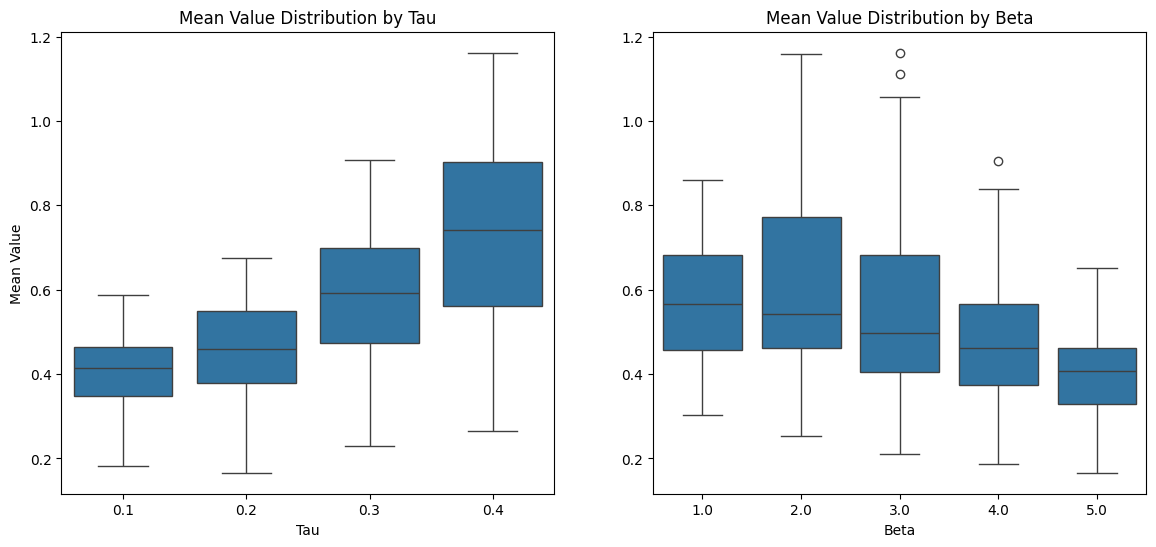

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Tau vs. Mean Value
sns.boxplot(ax=axes[0], data=df_summary, x='tau', y='mean_value')
axes[0].set_title('Mean Value Distribution by Tau')
axes[0].set_xlabel('Tau')
axes[0].set_ylabel('Mean Value')

# Box plot for Beta vs. Mean Value
sns.boxplot(ax=axes[1], data=df_summary, x='beta', y='mean_value')
axes[1].set_title('Mean Value Distribution by Beta')
axes[1].set_xlabel('Beta')
axes[1].set_ylabel('') # Hide y-label for the second plot for a cleaner look

<Axes: xlabel='beta', ylabel='tau'>

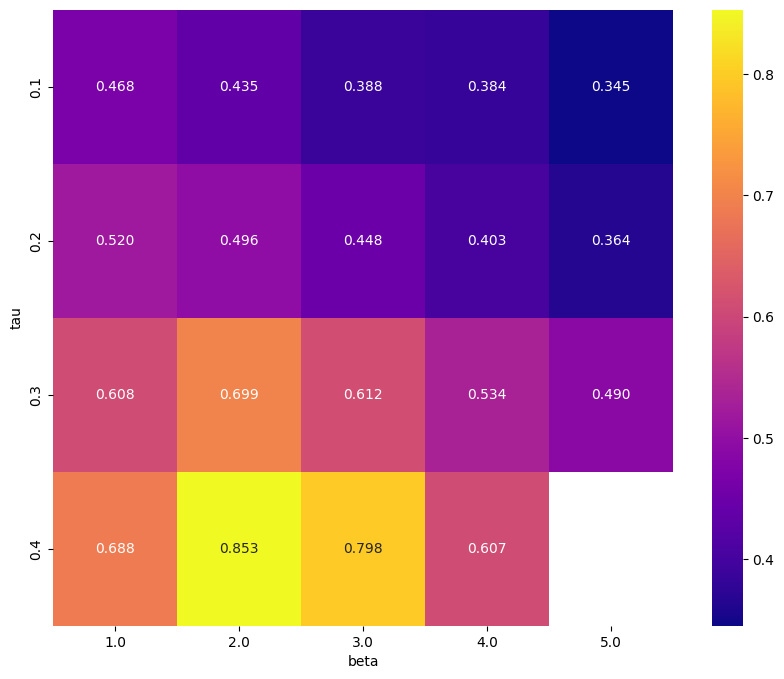

In [12]:
pivot_mean = df_summary.pivot_table(
    values='mean_value', 
    index='tau', 
    columns='beta'
)

# 2. Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_mean, annot=True, fmt=".3f", cmap="plasma")

In [13]:
import statsmodels.formula.api as smf

# Define and fit the model
model_mean = smf.ols(formula='mean_value ~ a2_param + tau + beta', data=df_summary)
results_mean = model_mean.fit()

# Print the summary table
print(results_mean.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_value   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           2.67e-59
Time:                        14:13:25   Log-Likelihood:                 170.55
No. Observations:                 188   AIC:                            -333.1
Df Residuals:                     184   BIC:                            -320.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1332      0.028      4.682      0.0

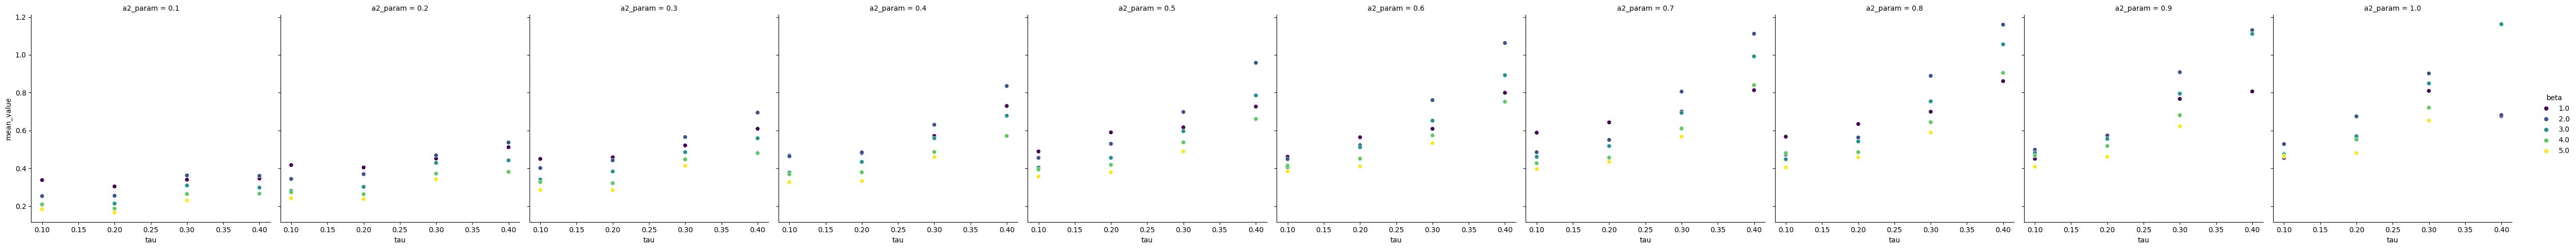

In [14]:
sns.relplot(
    data=df_summary, 
    x='tau', 
    y='mean_value', 
    hue='beta', 
    col='a2_param',
    palette='viridis',  # A nice color map for the 'beta' hue
    kind='scatter'
)

In [15]:
df_a2_filtered = df_summary[df_summary['a2_param'] == 0.1].copy()

In [24]:
df_a2_filtered

,a2_param,tau,beta,mean_value
0,0.1,0.1,1.0,0.337799
1,0.1,0.1,2.0,0.252993
2,0.1,0.1,3.0,0.211175
3,0.1,0.1,4.0,0.208662
4,0.1,0.1,5.0,0.183126
5,0.1,0.2,1.0,0.304052
6,0.1,0.2,2.0,0.254884
7,0.1,0.2,3.0,0.213529
8,0.1,0.2,4.0,0.186727
9,0.1,0.2,5.0,0.166165


Text(0, 0.5, '')

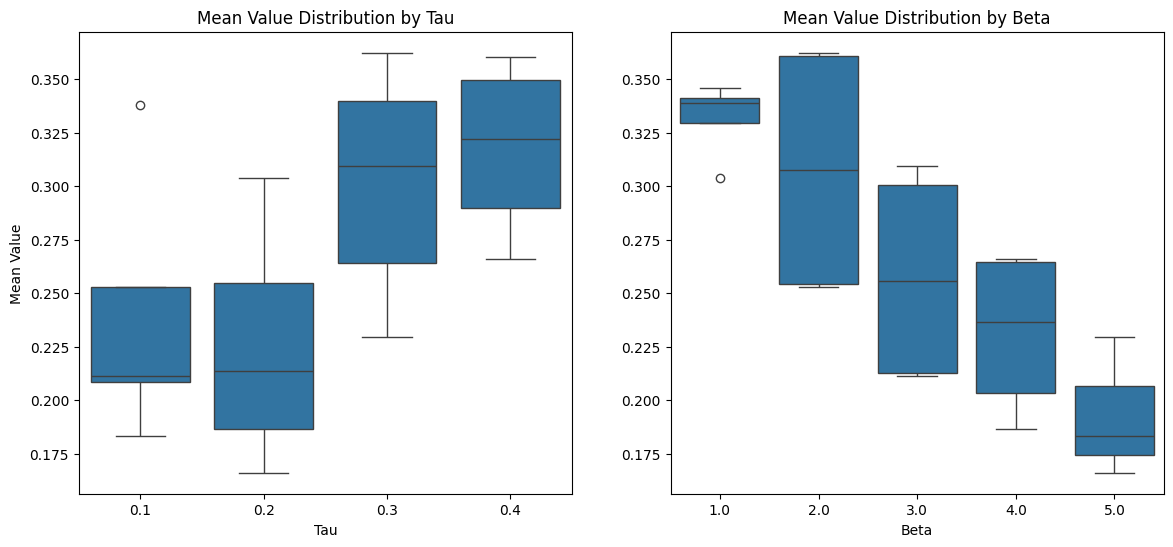

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Tau vs. Mean Value
sns.boxplot(ax=axes[0], data=df_a2_filtered, x='tau', y='mean_value')
axes[0].set_title('Mean Value Distribution by Tau')
axes[0].set_xlabel('Tau')
axes[0].set_ylabel('Mean Value')

# Box plot for Beta vs. Mean Value
sns.boxplot(ax=axes[1], data=df_a2_filtered, x='beta', y='mean_value')
axes[1].set_title('Mean Value Distribution by Beta')
axes[1].set_xlabel('Beta')
axes[1].set_ylabel('') # Hide y-label for the second plot for a cleaner look

<Axes: xlabel='beta', ylabel='tau'>

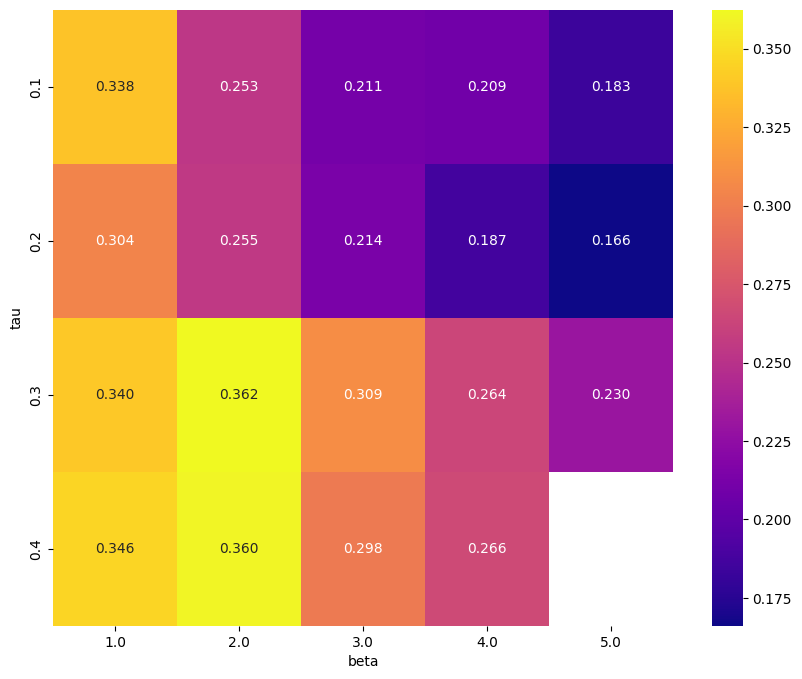

In [17]:
pivot_mean = df_a2_filtered.pivot_table(
    values='mean_value', 
    index='tau', 
    columns='beta'
)

# 2. Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_mean, annot=True, fmt=".3f", cmap="plasma")

In [18]:
df_dist_filtered = LE[LE['a2_param'] == 0.1].copy()

# 3. Explode the 'data' column to create a long-form DataFrame
#    This is the crucial step for plotting distributions.
df_long = df_dist_filtered.explode('data')

# 4. Ensure the data column is numeric
df_long['data'] = pd.to_numeric(df_long['data'])

print("Data is now ready for plotting.")
print(df_long.head())

Data is now ready for plotting.
    a2_param  tau  beta      data
12       0.1  0.2   2.0  0.450093
12       0.1  0.2   2.0  0.376727
12       0.1  0.2   2.0  0.367271
12       0.1  0.2   2.0  0.433398
12       0.1  0.2   2.0  0.521375


/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/3443746575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


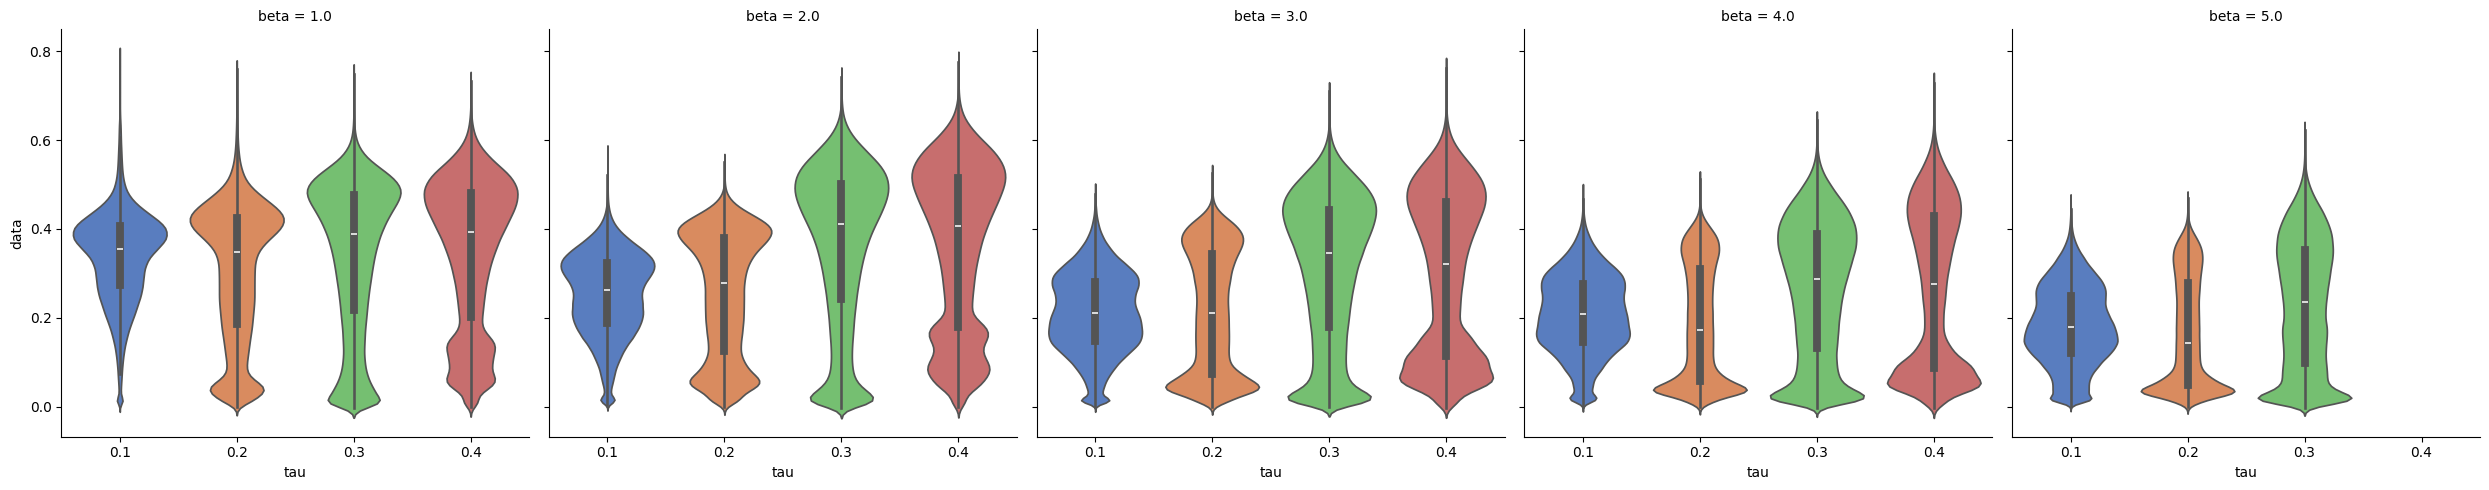

In [20]:
sns.catplot(
    data=df_long,
    x='tau',
    y='data',
    col='beta',
    kind='violin',
    palette='muted'
)

In [21]:
df_plot_data = df_long[df_long['beta'] != 1].copy()

/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/3338149092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


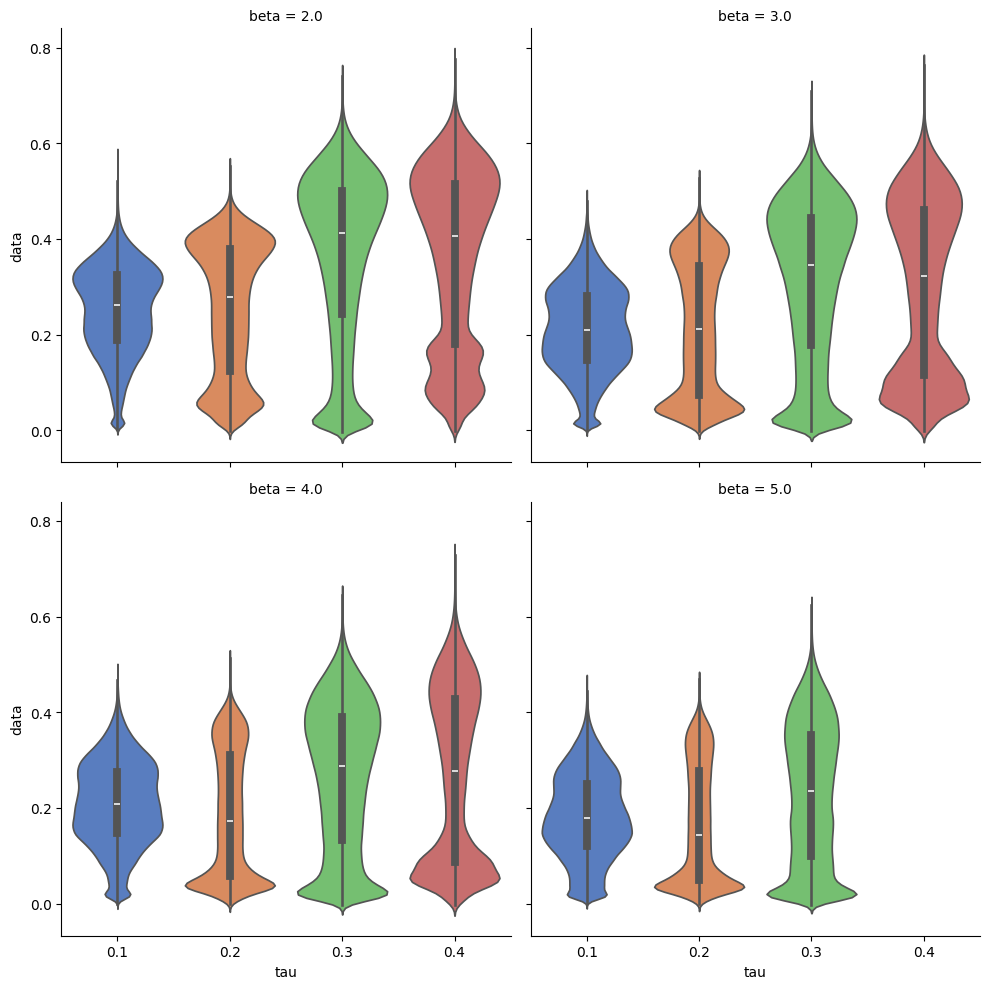

In [ ]:
sns.catplot(
    data=df_plot_data,
    x='tau',
    y='data',
    col='beta',       # This still separates the data into plots by beta value
    kind='violin',
    col_wrap=2,       # This creates the 2x2 layout
    palette='muted'
)


/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_82125/2984216273.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


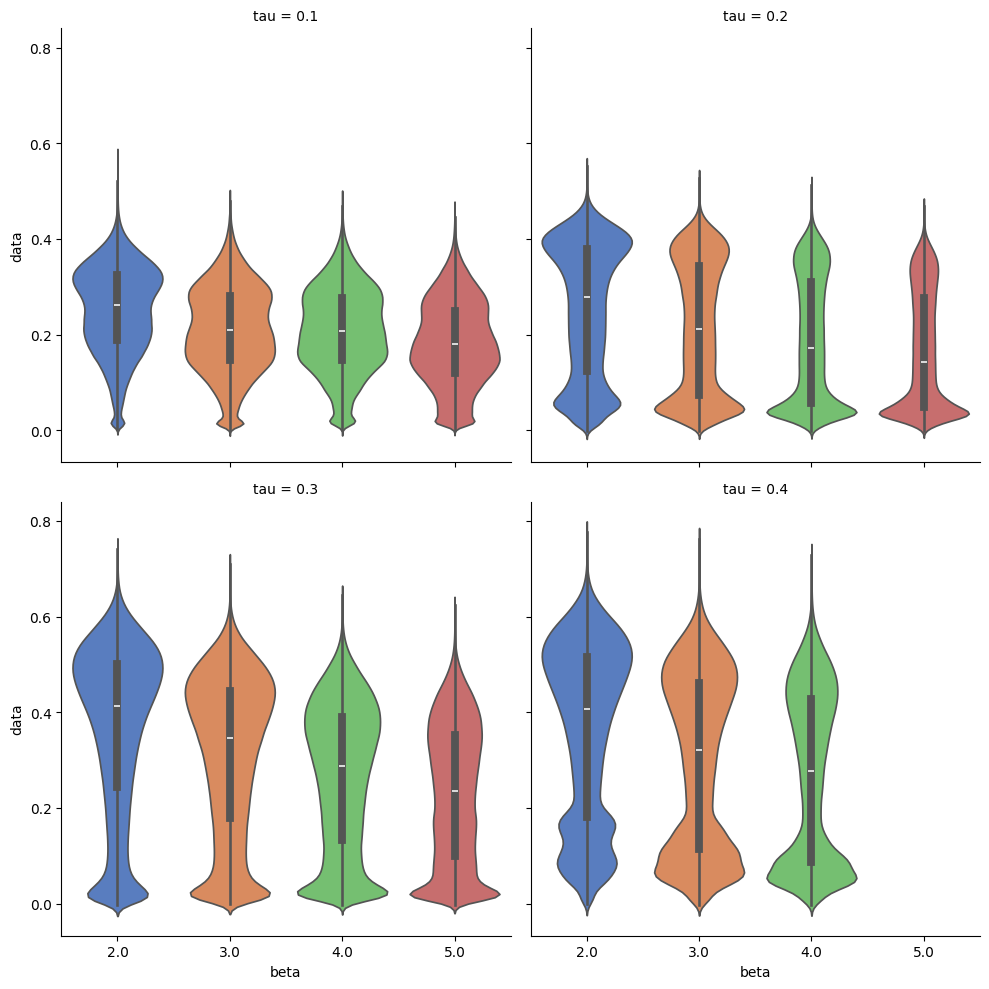

In [25]:
sns.catplot(
    data=df_plot_data,
    x='beta',
    y='data',
    col='tau',       # This still separates the data into plots by beta value
    kind='violin',
    col_wrap=2,       # This creates the 2x2 layout
    palette='muted'
)